In [1]:
import matplotlib.pyplot as plt
import matplotlib as mat
import pandas as pd
import numpy as np

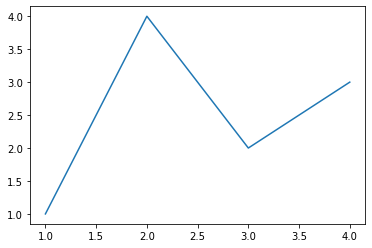

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

In [3]:
# 시도별 전출입 인구수 파일을 가져오기
csdf = pd.read_excel("./data/시도별 전출입 인구수.xlsx")
csdf.head(2)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226


In [4]:
# 데이터가공 첫단계 = null처리
csdf.fillna(method="ffill", inplace=True) # 반드시 null 처리

In [5]:
#전출지가 서울특별시, 전입지는 서울특별시가 아닌 지역
csdf_seoul = csdf[(csdf["전출지별"] == "서울특별시") & (csdf["전입지별"] != "서울특별시")]
csdf_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [6]:
# 전출지별 컬럼을 삭제
csdf_seoul = csdf_seoul.drop(["전출지별"], axis = 1)
csdf_seoul

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [7]:
# "전입지별" 컬럼명을 "전입지"로 변경
csdf_seoul.rename({"전입지별": "전입지"}, axis = 1, inplace=True) 
csdf_seoul

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [8]:
# 인덱스를 "전입지"로
csdf_seoul.set_index("전입지", inplace=True)
csdf_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [9]:
# 서울에서 경기도로 전입한 인구 데이터만 검색
csdf_seoul_one = csdf_seoul.loc["경기도"]
csdf_seoul_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

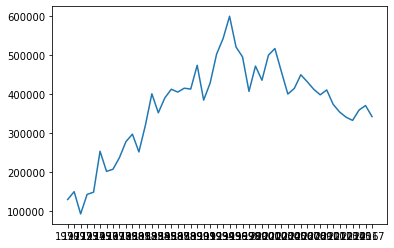

In [10]:
plt.plot(csdf_seoul_one) # [x] 생략 가능

In [11]:
mat.rcParams["font.family"] = 'Malgun Gothic'

Text(39, 520000, '인구이동 감소(1995-2017)')

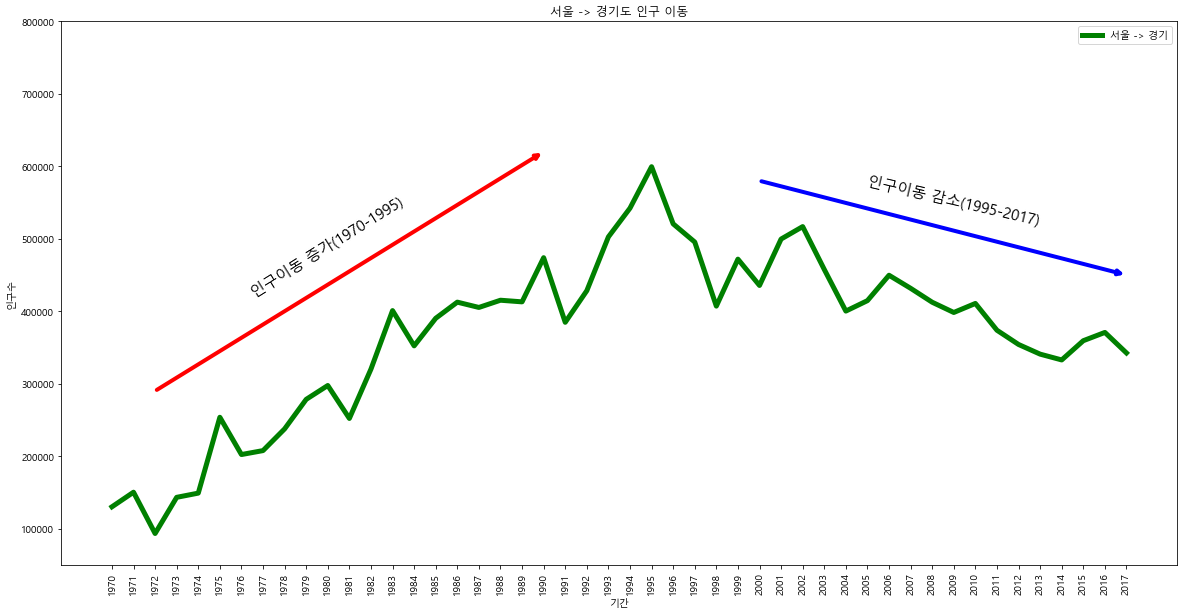

In [12]:
# 피규어 사이즈
plt.figure(figsize=(20, 10))

# x축을 로테이트
plt.xticks(rotation = "vertical")

plt.plot(csdf_seoul_one. index, csdf_seoul_one.values, "g-", linewidth = 5) # "r-" = red, line

# 제목 지정
plt.title("서울 -> 경기도 인구 이동")

# x, y축 라벨 정의
plt.xlabel("기간"); plt.ylabel("인구수")

#범례 표시
plt.legend(labels = ["서울 -> 경기"], loc = "best")

# 표시할 범위 지정
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='red', lw=4), #화살표 서식
             )

plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 420000),            #텍스트 위치 기준점
             rotation=32,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='blue', lw=4),  #화살표 서식
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(39, 520000),            #텍스트 위치 기준점
             rotation=-13,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

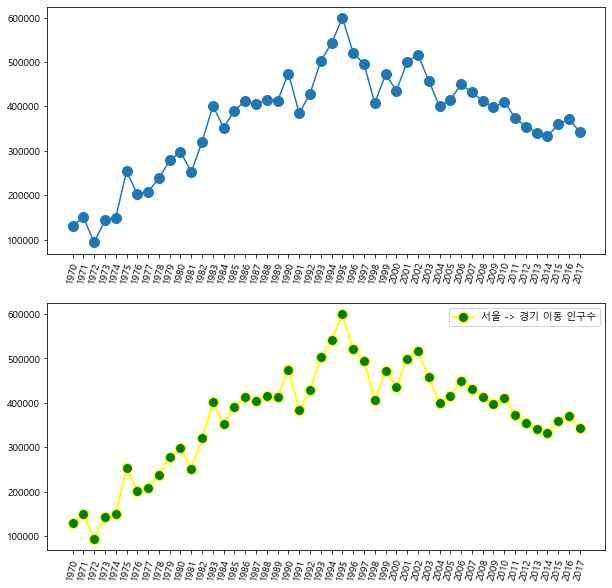

In [13]:
# 한 화면에 여러개의 그래프 그리기
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1) # (한 행의 그래프 개수, 한 열의 그래프 개수, 그래프 순서)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(csdf_seoul_one, marker = "o", markersize = 10)
ax2.plot(csdf_seoul_one, marker = "o", markerfacecolor = "green", markersize = 10, color = "yellow", linewidth = 2, 
         label = "서울 -> 경기 이동 인구수")
ax2.legend(loc = "best")

ax1.tick_params(axis = "x", rotation = 75)
ax2.tick_params(axis = "x", rotation = 75)

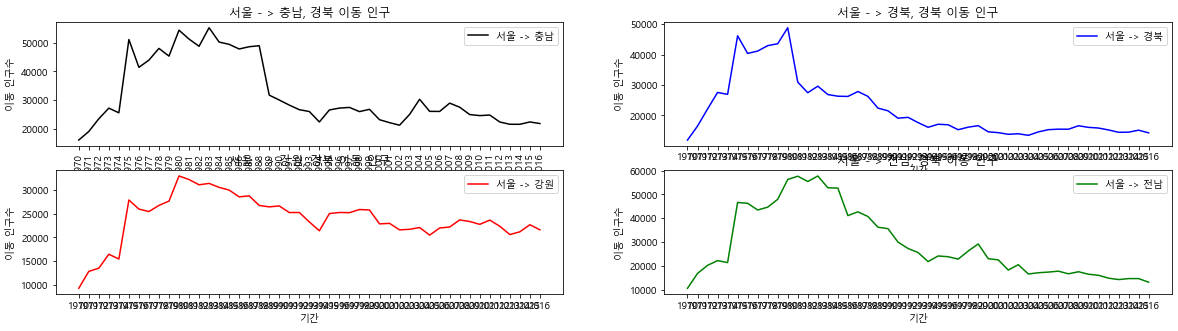

In [28]:
# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이전한 자료만 선택
# 하나의 plot에 여러개 그리기
col_years = list(map(str, range(1970, 2017))) # map 함수 안의 정보를 하나씩 다 해라

tcsdf = csdf_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years]
#tcsdf.head()

fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, tcsdf.loc["충청남도", :], color = "black", label = "서울 -> 충남")
ax2.plot(col_years, tcsdf.loc["경상북도", :], color = "blue", label = "서울 -> 경북")
ax3.plot(col_years, tcsdf.loc["강원도", :], color = "red", label = "서울 -> 강원")
ax4.plot(col_years, tcsdf.loc["전라남도", :], color = "green", label = "서울 -> 전남")

ax1.legend(loc = "best")
ax2.legend(loc = "best")
ax3.legend(loc = "best")
ax4.legend(loc = "best")

ax1.set_title("서울 - > 충남, 경북 이동 인구")
ax2.set_title("서울 - > 경북, 경북 이동 인구")
ax3.set_title("서울 - > 강원, 경북 이동 인구")
ax4.set_title("서울 - > 전남, 경북 이동 인구")

ax1.set_xlabel("기간")
ax2.set_xlabel("기간")
ax3.set_xlabel("기간")
ax4.set_xlabel("기간")

ax1.set_ylabel("이동 인구수")
ax2.set_ylabel("이동 인구수")
ax3.set_ylabel("이동 인구수")
ax4.set_ylabel("이동 인구수")

ax1.tick_params(axis = "x", labelrotation = 90)
ax1.tick_params(axis = "x", labelrotation = 90)
ax1.tick_params(axis = "x", labelrotation = 90)
ax1.tick_params(axis = "x", labelrotation = 90)

plt.show()

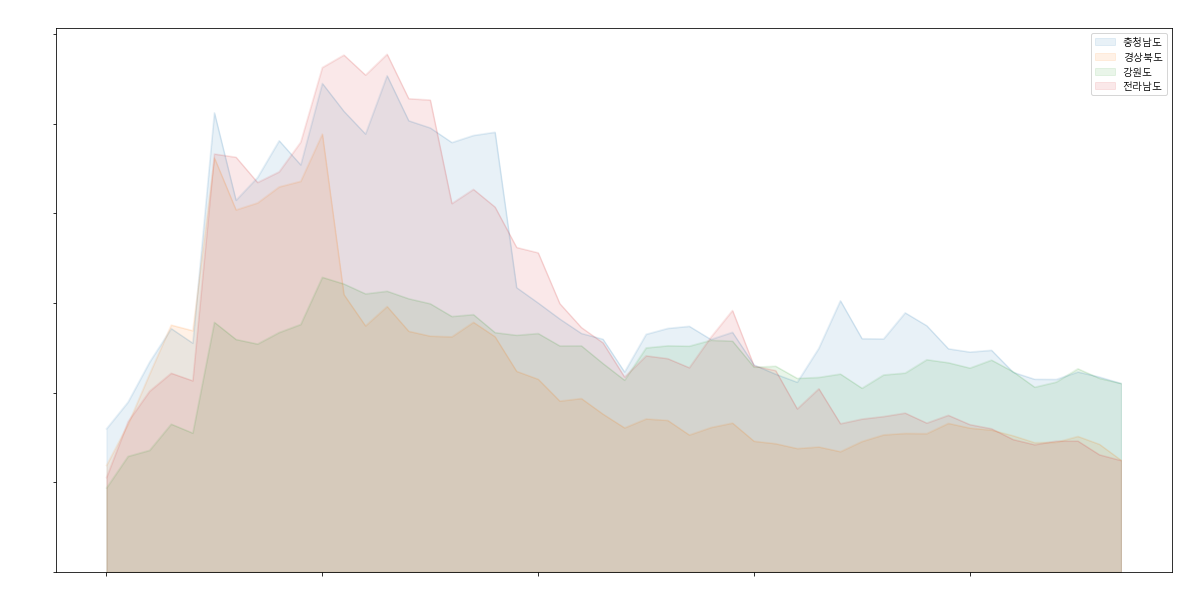

In [46]:
# 서울에서 "충청남도", "경상북도", "강원도", "전라남도"로 이전한 자료만 선택, 하나의 plot에 여러개 그래프 그리기
# 면적 그래프
col_years1 = list(map(str, range(1970, 2018)))

df_1 = csdf_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years1]
df_1 = df_1.T
df_1.index = df_1.index.map(int)

df_1.plot(kind="area", stacked = False, alpha = 0.1, figsize = (20, 10)) # kind="area" 면적그래프
plt.title("서울 -> 충남, 경북, 강원, 전남 이동 인구 수", color = "white", fontsize = 20)

# plt.xlabel("기간", loc = "center", color = "yellow", fontsize = 13) / parameter : shift + tab 눌러 볼 것
plt.ylabel("이동 인구 수", color = "white")
plt.xlabel("기간", color = "white")

plt.xticks(color = "white")
plt.yticks(color = "white")

plt.legend(loc = "best")

plt.show()

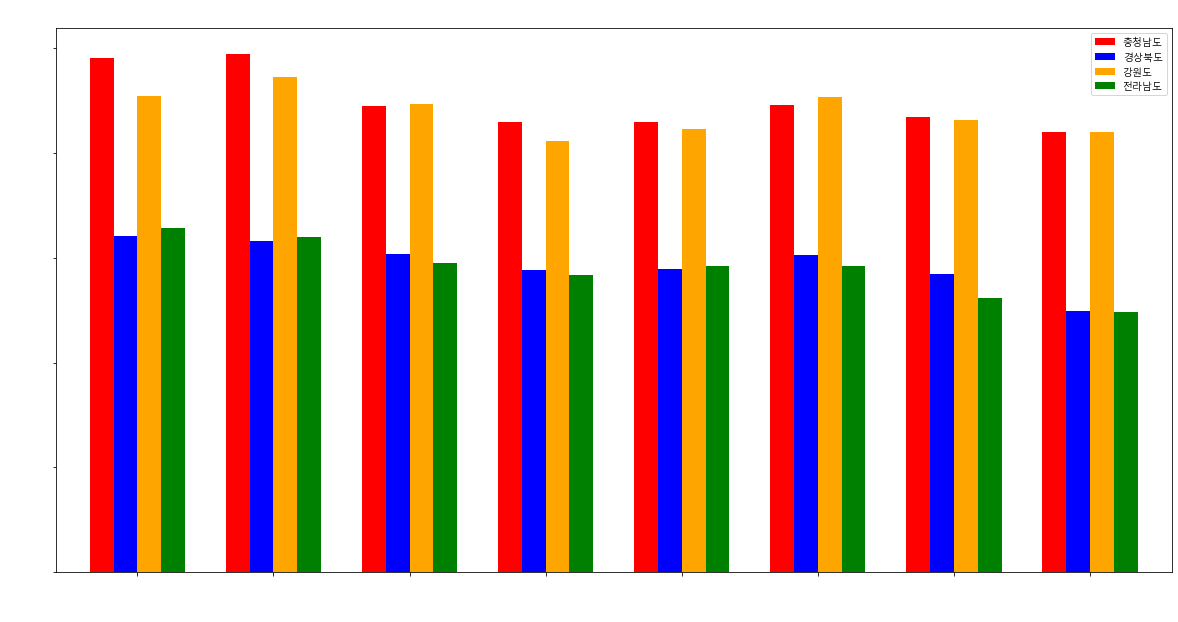

In [49]:
col_years1 = list(map(str, range(2010, 2018)))

df_1 = csdf_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years1]
df_1 = df_1.T
df_1.index = df_1.index.map(int)

df_1.plot(kind="bar", width = 0.7, figsize = (20, 10), color = ["red", "blue", "orange", "green"]) # kind="area" 면적그래프
plt.title("서울 -> 충남, 경북, 강원, 전남 이동 인구 수", color = "white", fontsize = 20)

# plt.xlabel("기간", loc = "center", color = "yellow", fontsize = 13) / parameter : shift + tab 눌러 볼 것
plt.ylabel("이동 인구 수", color = "white")
plt.xlabel("기간", color = "white")

plt.xticks(color = "white")
plt.yticks(color = "white")

plt.legend(loc = "best")

plt.show()

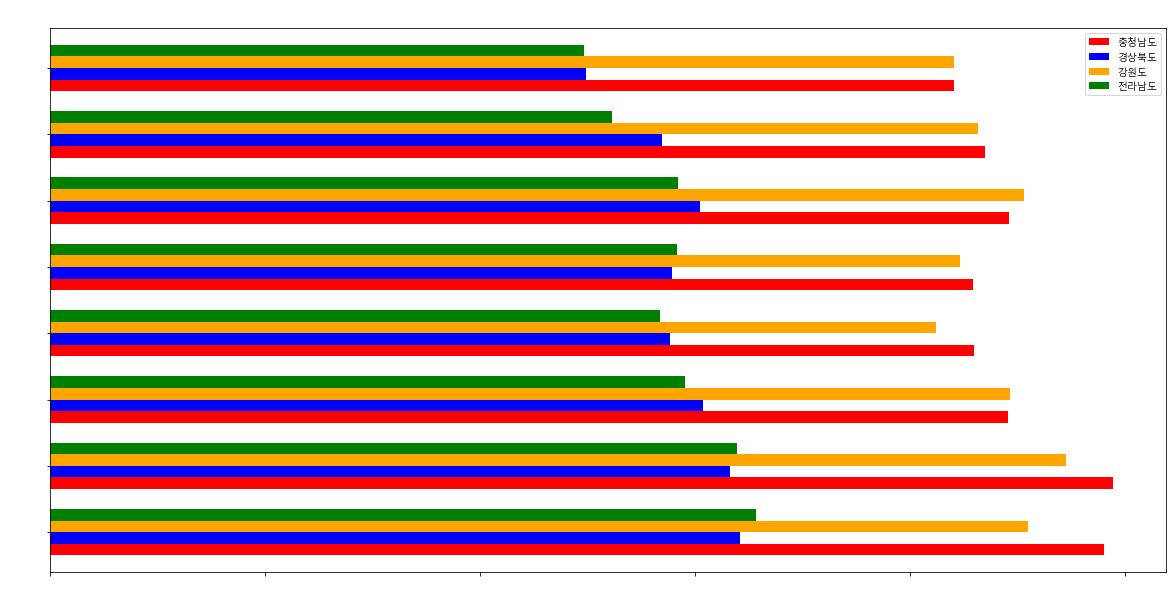

In [54]:
col_years1 = list(map(str, range(2010, 2018)))

df_1 = csdf_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years1]
df_1 = df_1.T
df_1.index = df_1.index.map(int).T

df_1.plot(kind="barh", width = 0.7, figsize = (20, 10), color = ["red", "blue", "orange", "green"]) # kind="area" 면적그래프
plt.title("서울 -> 충남, 경북, 강원, 전남 이동 인구 수", color = "white", fontsize = 20)

# plt.xlabel("기간", loc = "center", color = "yellow", fontsize = 13) / parameter : shift + tab 눌러 볼 것
plt.ylabel("이동 인구 수", color = "white")
plt.xlabel("기간", color = "white")

plt.xticks(color = "white")
plt.yticks(color = "white")

plt.legend(loc = "best")

plt.show()

In [59]:
csdf_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [58]:
# axis = 0 세로 / axis = 1 가로
col_years1 = list(map(str, range(2010, 2018)))

df_5 = csdf_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_years1]
df_5["합계"] = csdf_seoul.sum(axis = 1)
df_total = df_5[["합계"]].sort_values(by = "합계")

df_total

#df_5.plot(kind="barh", width = 0.7, figsize = (20, 10)) # kind="area" 면적그래프
#plt.title("서울 -> 충남, 경북, 강원, 전남 이동 인구 수", color = "white", fontsize = 20)
# 
# # plt.xlabel("기간", loc = "center", color = "yellow", fontsize = 13) / parameter : shift + tab 눌러 볼 것
# plt.ylabel("이동 인구 수", color = "white")
# plt.xlabel("기간", color = "white")
# 
# plt.xticks(color = "white")
# plt.yticks(color = "white")
# 
# plt.legend(loc = "best")
# 
# plt.show()

,합계
전입지,
충청남도,0.0
경상북도,0.0
강원도,0.0
전라남도,0.0


In [65]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T 
df

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [67]:
# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'}) # 합계 column명을 총 발전량으로 변경
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


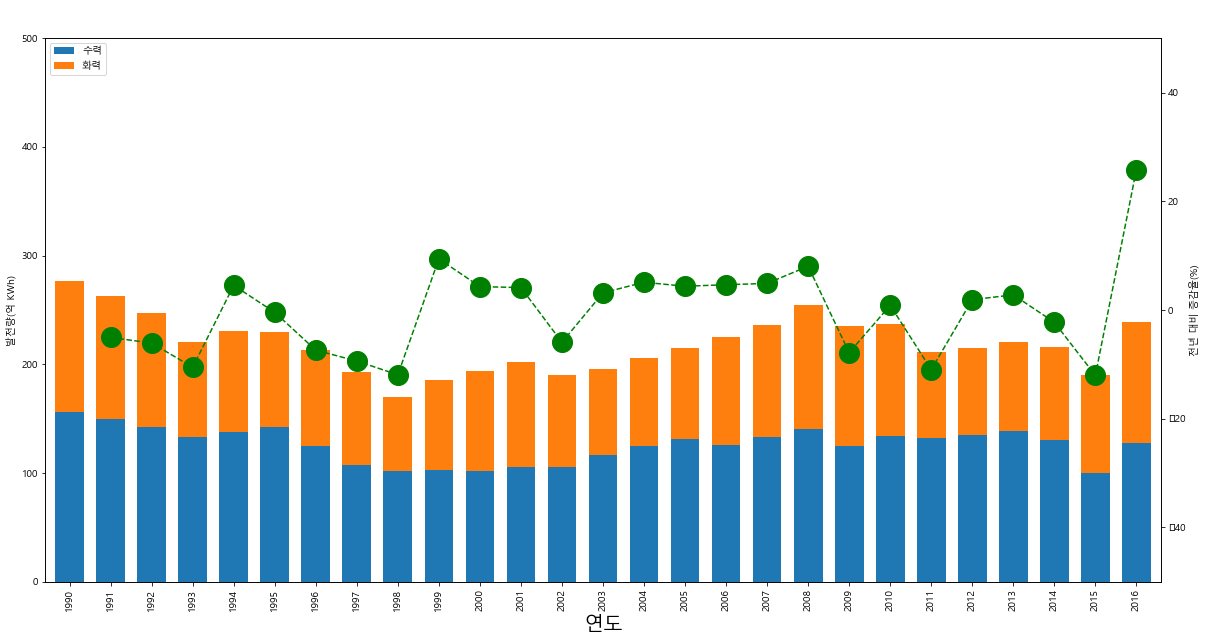

In [69]:
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx() # x축을 공유해서 사용
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, 
         color='green', label='전년대비 증감율(%)')  

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30, color = "white")
ax1.legend(loc='upper left')

plt.show()

1. plot 생성 : 
    1-1 사이즈? 
    1-2 몇개의 그래프를 그릴건지?
2. title 정의, 여러개면 legend, x축, y축, 그래프 타입?, xlabel, ylabel
3. annotate(), twinx() x축을 공유해서 그래프를 그림

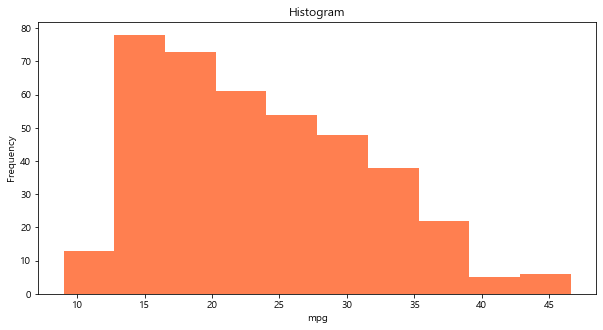

In [71]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

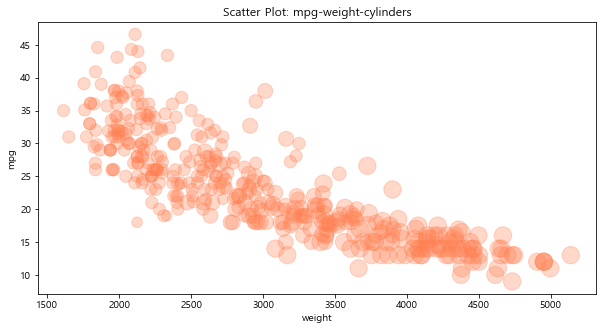

<Figure size 432x288 with 0 Axes>

In [82]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

plt.savefig("./data/figure.png")

In [ ]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


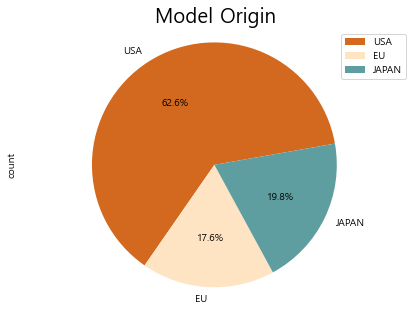

In [80]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

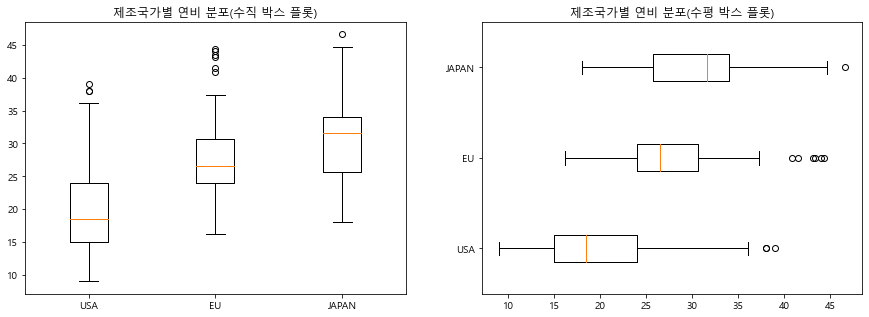

In [84]:
# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성) boxplot 오류 값을 찾기 위해 많이 사용
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()